### Importing Libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [116]:
df = pd.read_csv("./Employee’s Performance.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


### Information of Dataset

In [117]:
# Dimensions of dataset
df.shape

(17417, 13)

In [118]:
# Summary of dataset
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 6.4 MB


In [119]:
# Column names
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [120]:
# Renaming the column names
df.rename(columns={'employee_id':'Employee_ID', 'department':'Department', 'region':'Region', 'education':'Education', 'gender':'Gender',
       'recruitment_channel':'Recruitment_Channel', 'no_of_trainings':'No_of_Trainings', 'age':'Age', 'previous_year_rating':'Previous_Year_Rating',
       'length_of_service':'Length_of_Service', 'KPIs_met_more_than_80':'KPIs_Met_More_Than_80', 'awards_won':'Awards_Won',
       'avg_training_score':'Avg_Training_Score'},inplace=True)

In [121]:
df.head()

,Employee_ID,Department,Region,Education,Gender,Recruitment_Channel,No_of_Trainings,Age,Previous_Year_Rating,Length_of_Service,KPIs_Met_More_Than_80,Awards_Won,Avg_Training_Score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


### Cleaning of Dataset

In [122]:
# Checking Null values
df.isnull().sum()

Employee_ID                 0
Department                  0
Region                      0
Education                 771
Gender                      0
Recruitment_Channel         0
No_of_Trainings             0
Age                         0
Previous_Year_Rating     1363
Length_of_Service           0
KPIs_Met_More_Than_80       0
Awards_Won                  0
Avg_Training_Score          0
dtype: int64

In [123]:
df["Previous_Year_Rating"].fillna(df["Previous_Year_Rating"].mean(), 
                                  inplace=True)
df["Education"].fillna(method="ffill", inplace=True)

C:\Users\nehal\AppData\Local\Temp/ipykernel_21356/2198904665.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Education"].fillna(method="ffill", inplace=True)


In [124]:
# Removing outliers from Length_of_Service
Q1 = df["Length_of_Service"].quantile(0.25)
Q3 = df["Length_of_Service"].quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out rows with outliers
df = df[(df['Length_of_Service'] >= lower_bound) & (df['Length_of_Service'] <= upper_bound)]

In [125]:
df.drop_duplicates(inplace=True)

### Descriptive Statistics

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee_ID,16332.0,38980.459221,22693.823970,3.0,19204.5,39017.5,58686.0,78295.0
No_of_Trainings,16332.0,1.256490,0.601702,1.0,1.0,1.0,1.0,9.0
Age,16332.0,33.870377,6.858242,20.0,29.0,33.0,37.0,60.0
Previous_Year_Rating,16332.0,3.348448,1.208417,1.0,3.0,3.0,4.0,5.0
Length_of_Service,16332.0,5.033064,2.884252,1.0,3.0,5.0,7.0,13.0
KPIs_Met_More_Than_80,16332.0,0.366336,0.481818,0.0,0.0,0.0,1.0,1.0
Awards_Won,16332.0,0.024308,0.154009,0.0,0.0,0.0,0.0,1.0
Avg_Training_Score,16332.0,63.237877,13.483671,39.0,51.0,60.0,76.0,99.0


### Data Visualization

#### For Numerical Data

#### Histogram

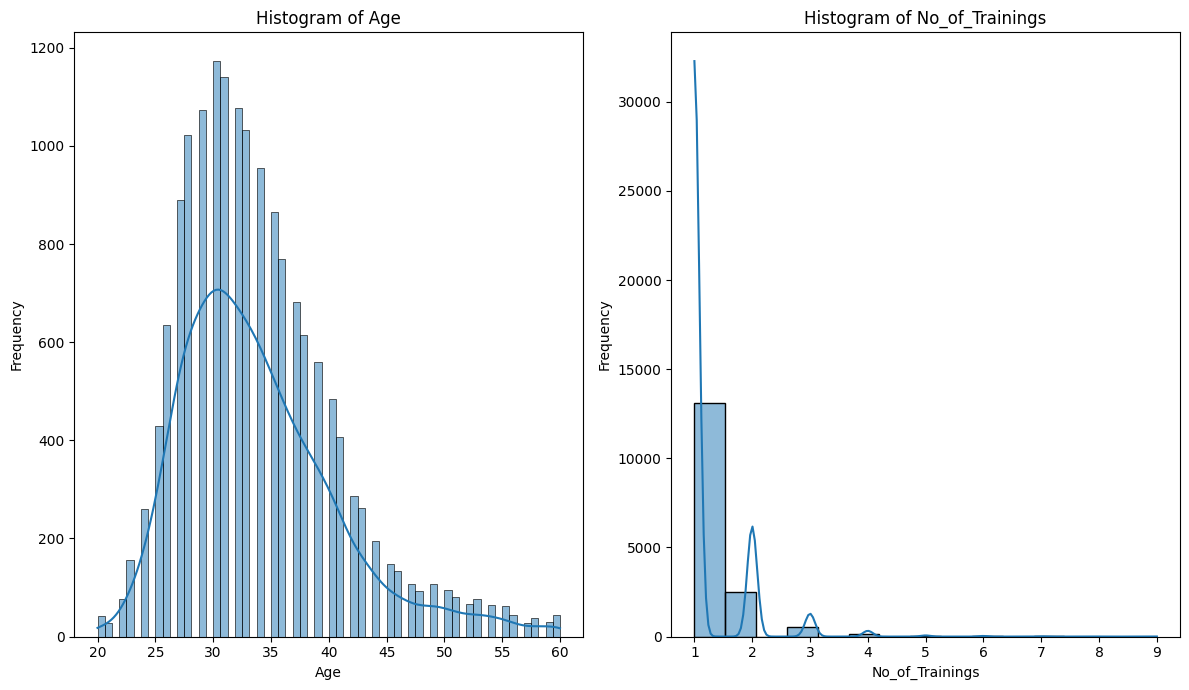

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
sns.histplot(df["Age"], kde=True, ax=axes[0])
sns.histplot(df["No_of_Trainings"], kde=True, ax=axes[1])
axes[0].set_title("Histogram of Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[1].set_title("Histogram of No_of_Trainings")
axes[1].set_xlabel("No_of_Trainings")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

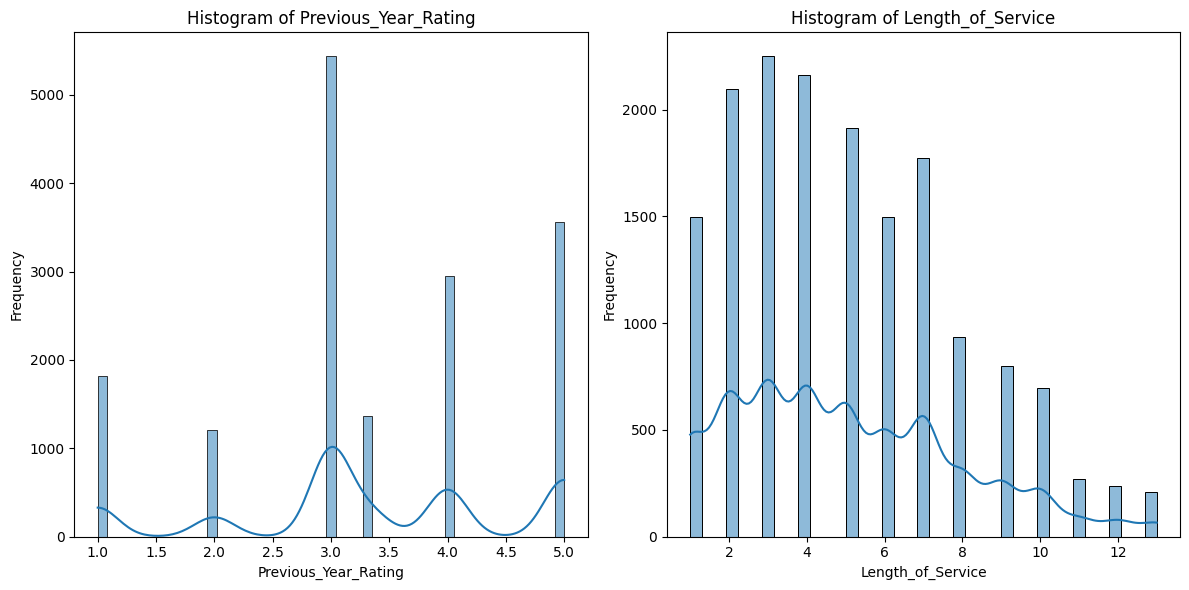

In [128]:
numerical_columns = ['Previous_Year_Rating', 'Length_of_Service']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

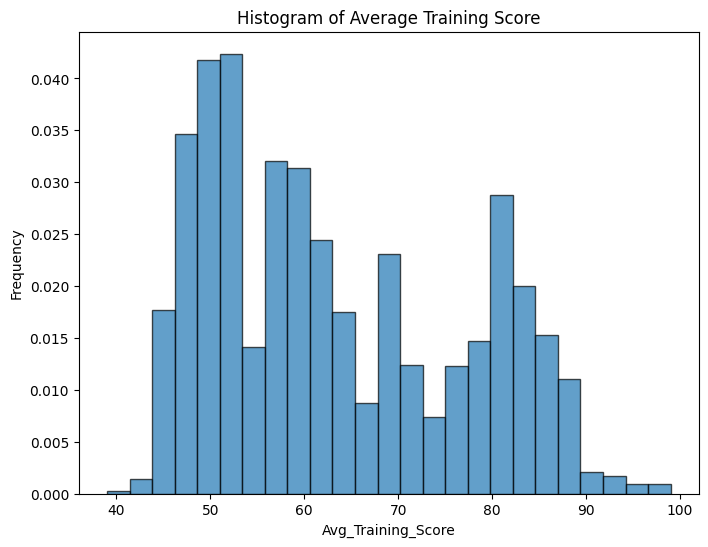

In [129]:
plt.figure(figsize=(8,6))
plt.hist(df["Avg_Training_Score"], bins=25, density=True,
         alpha=0.7, edgecolor="black")
plt.title("Histogram of Average Training Score")
plt.xlabel("Avg_Training_Score")
plt.ylabel("Frequency")
plt.show()

#### Boxplot

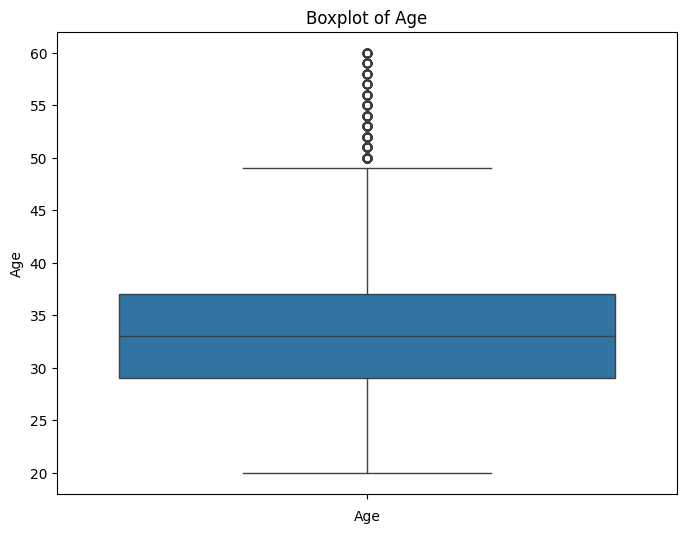

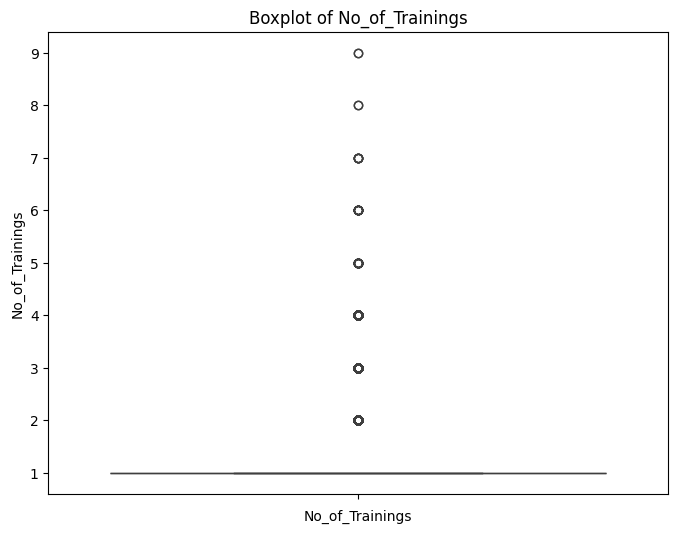

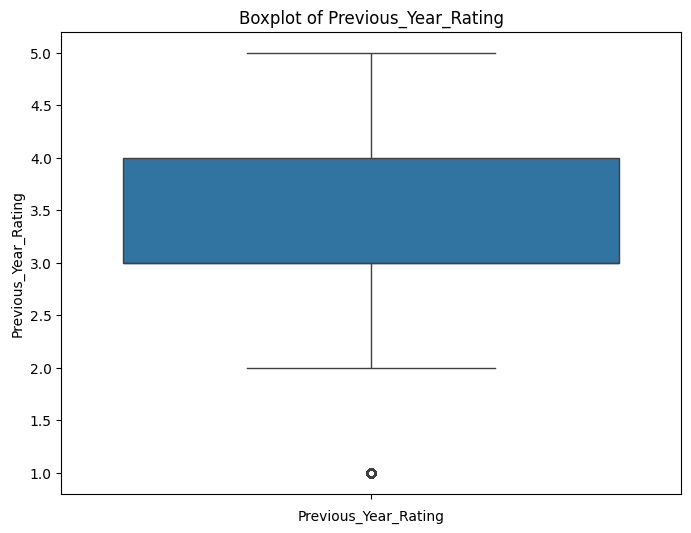

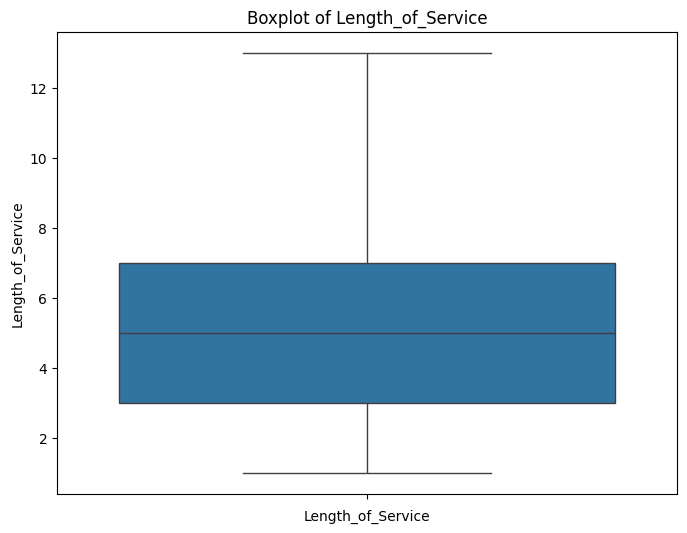

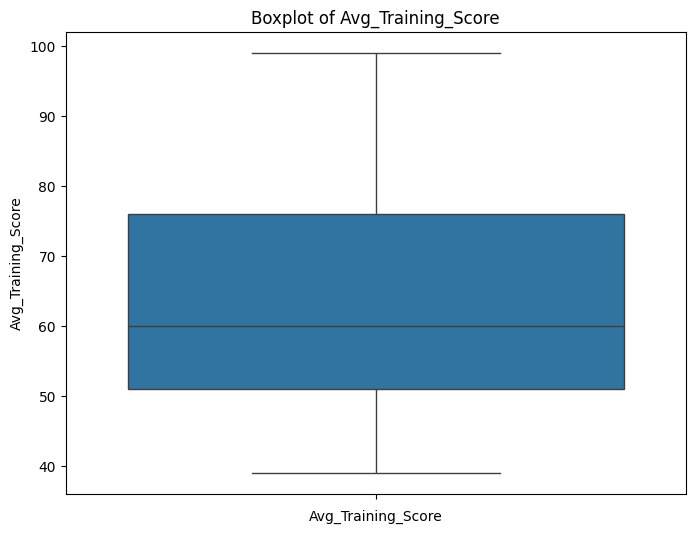

In [130]:
numerical_columns = ['Age', 'No_of_Trainings', 'Previous_Year_Rating', 
                     'Length_of_Service', 'Avg_Training_Score']

for column in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

#### For Catagorical Data

#### Bar Chart

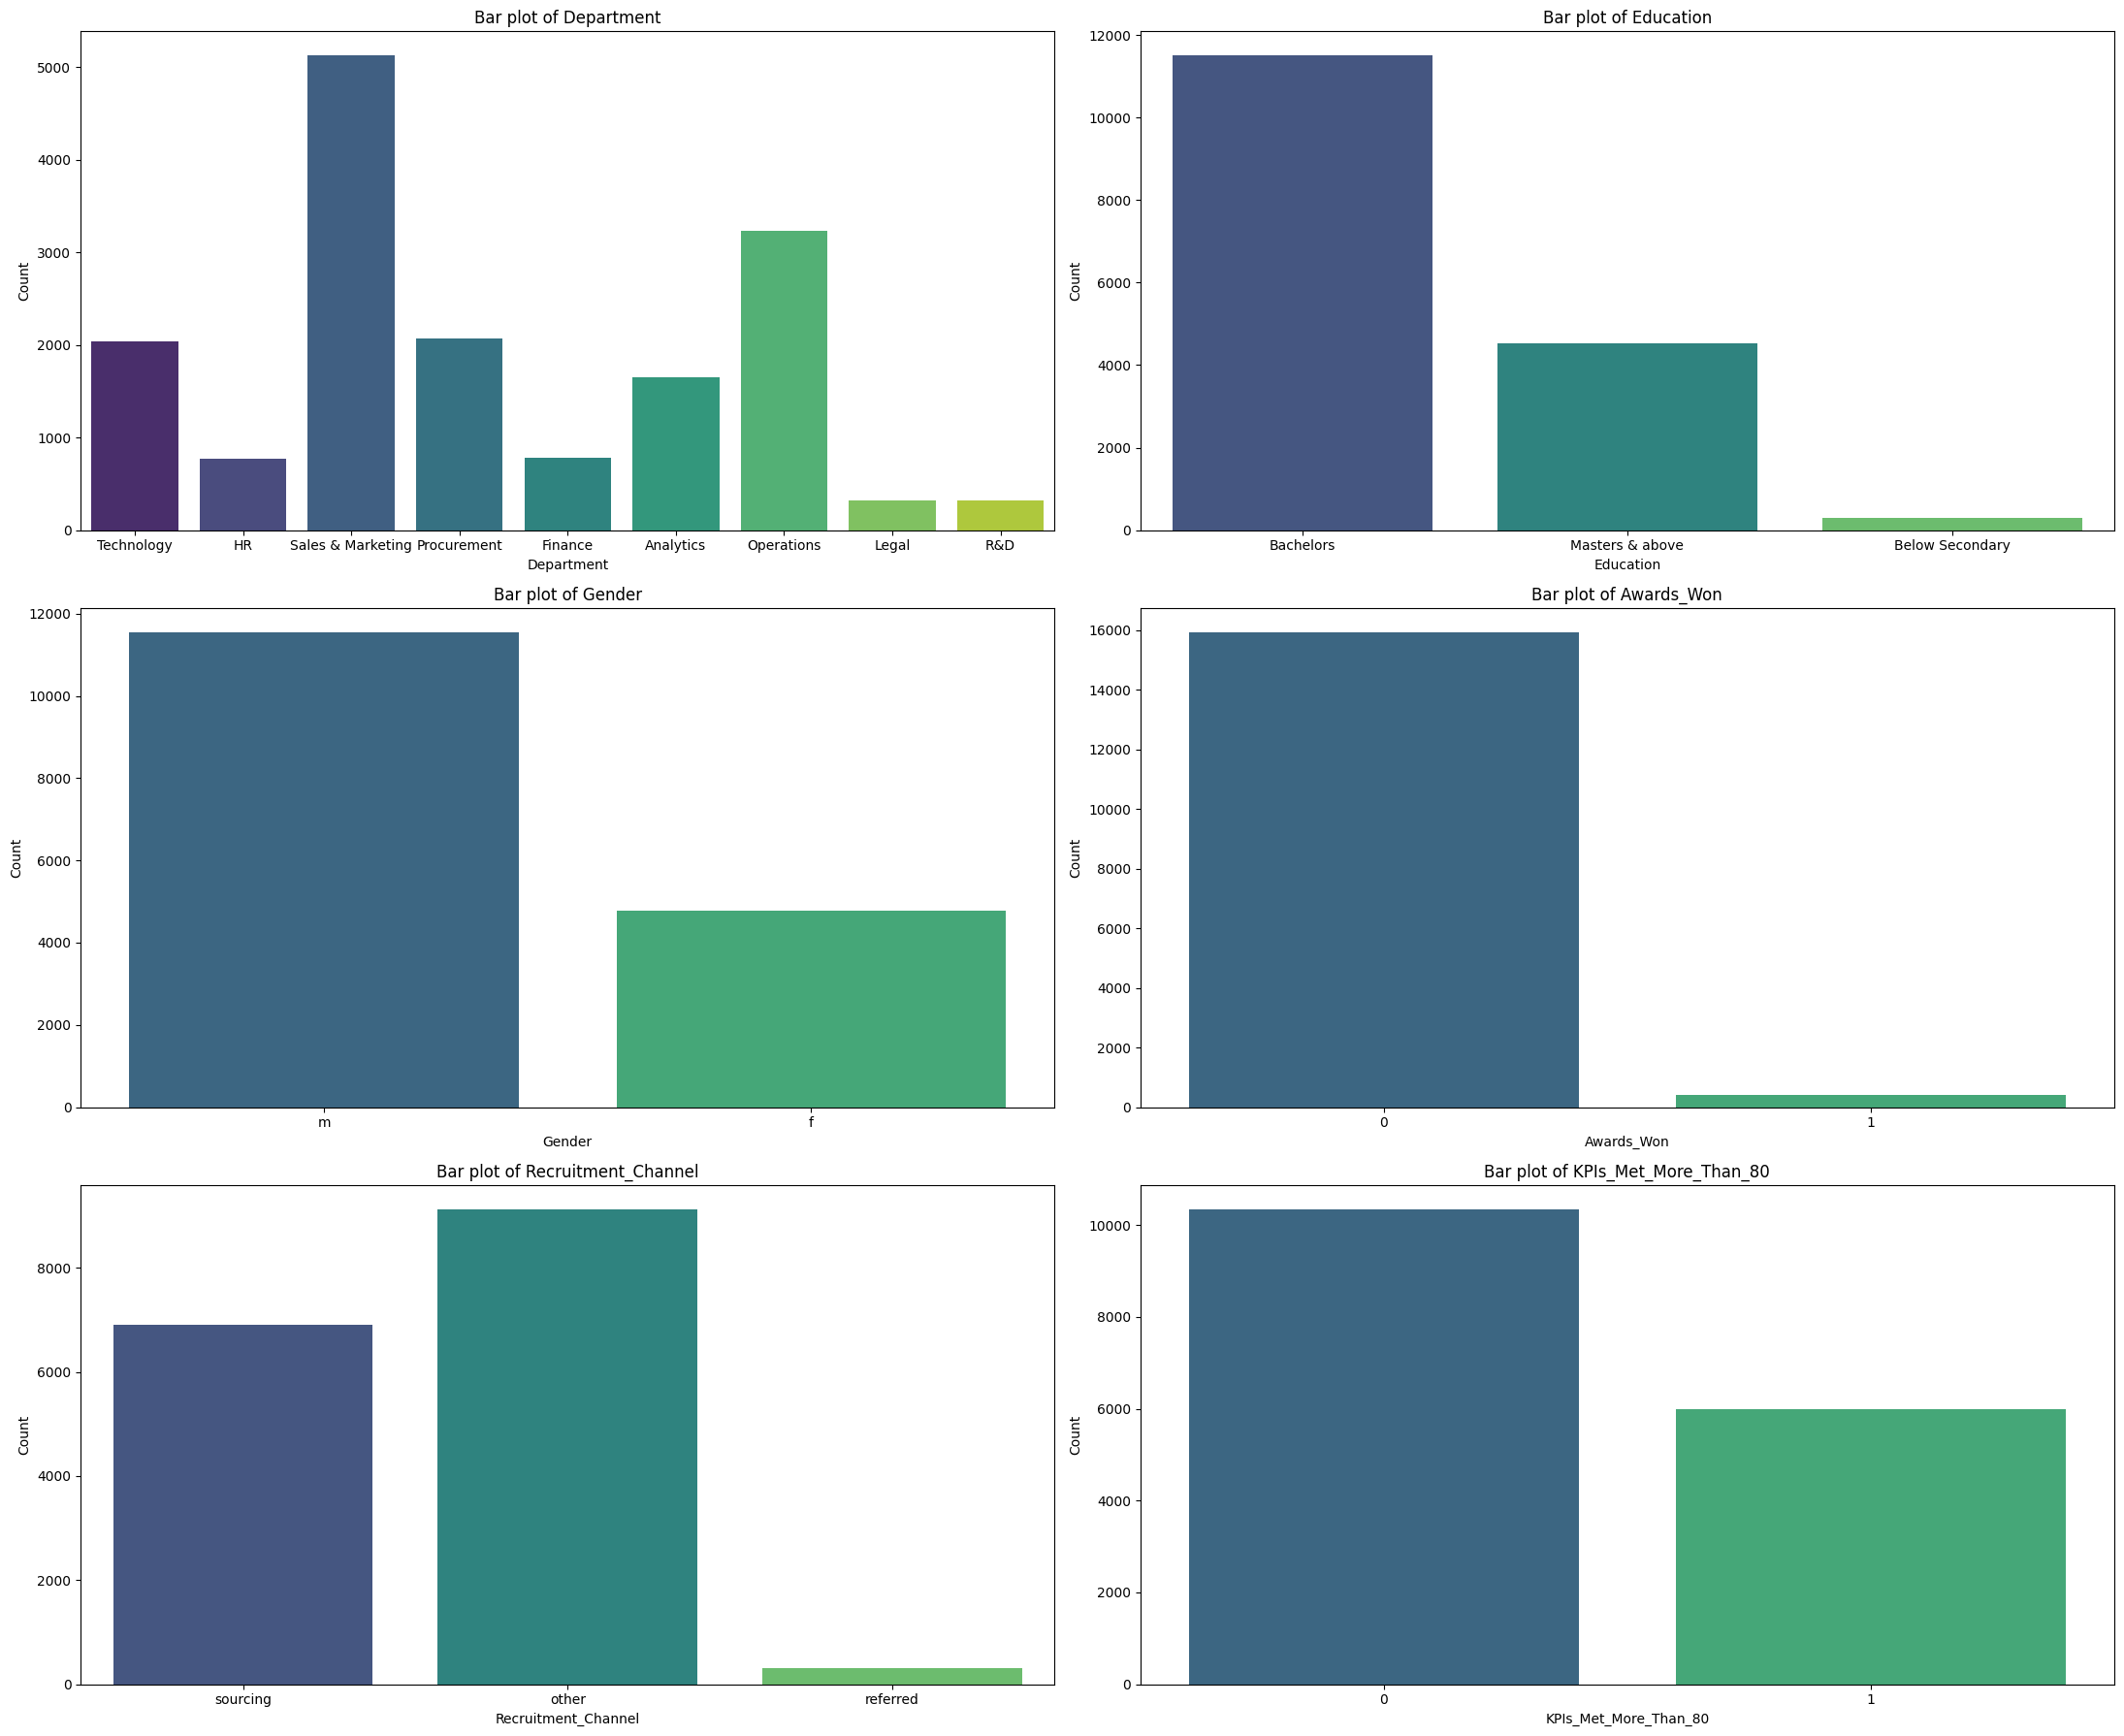

In [131]:
categorical_columns = ['Department', 'Education', 'Gender', 'Awards_Won',
                       'Recruitment_Channel', 'KPIs_Met_More_Than_80']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 18))

for i, column in enumerate(categorical_columns):
    row = i // 2 
    col = i % 2
    ax = axes[row, col]
    sns.countplot(data=df, x=column, ax=ax, palette="viridis", 
                  hue=column, legend=False)
    ax.set_title(f'Bar plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Pie Chart

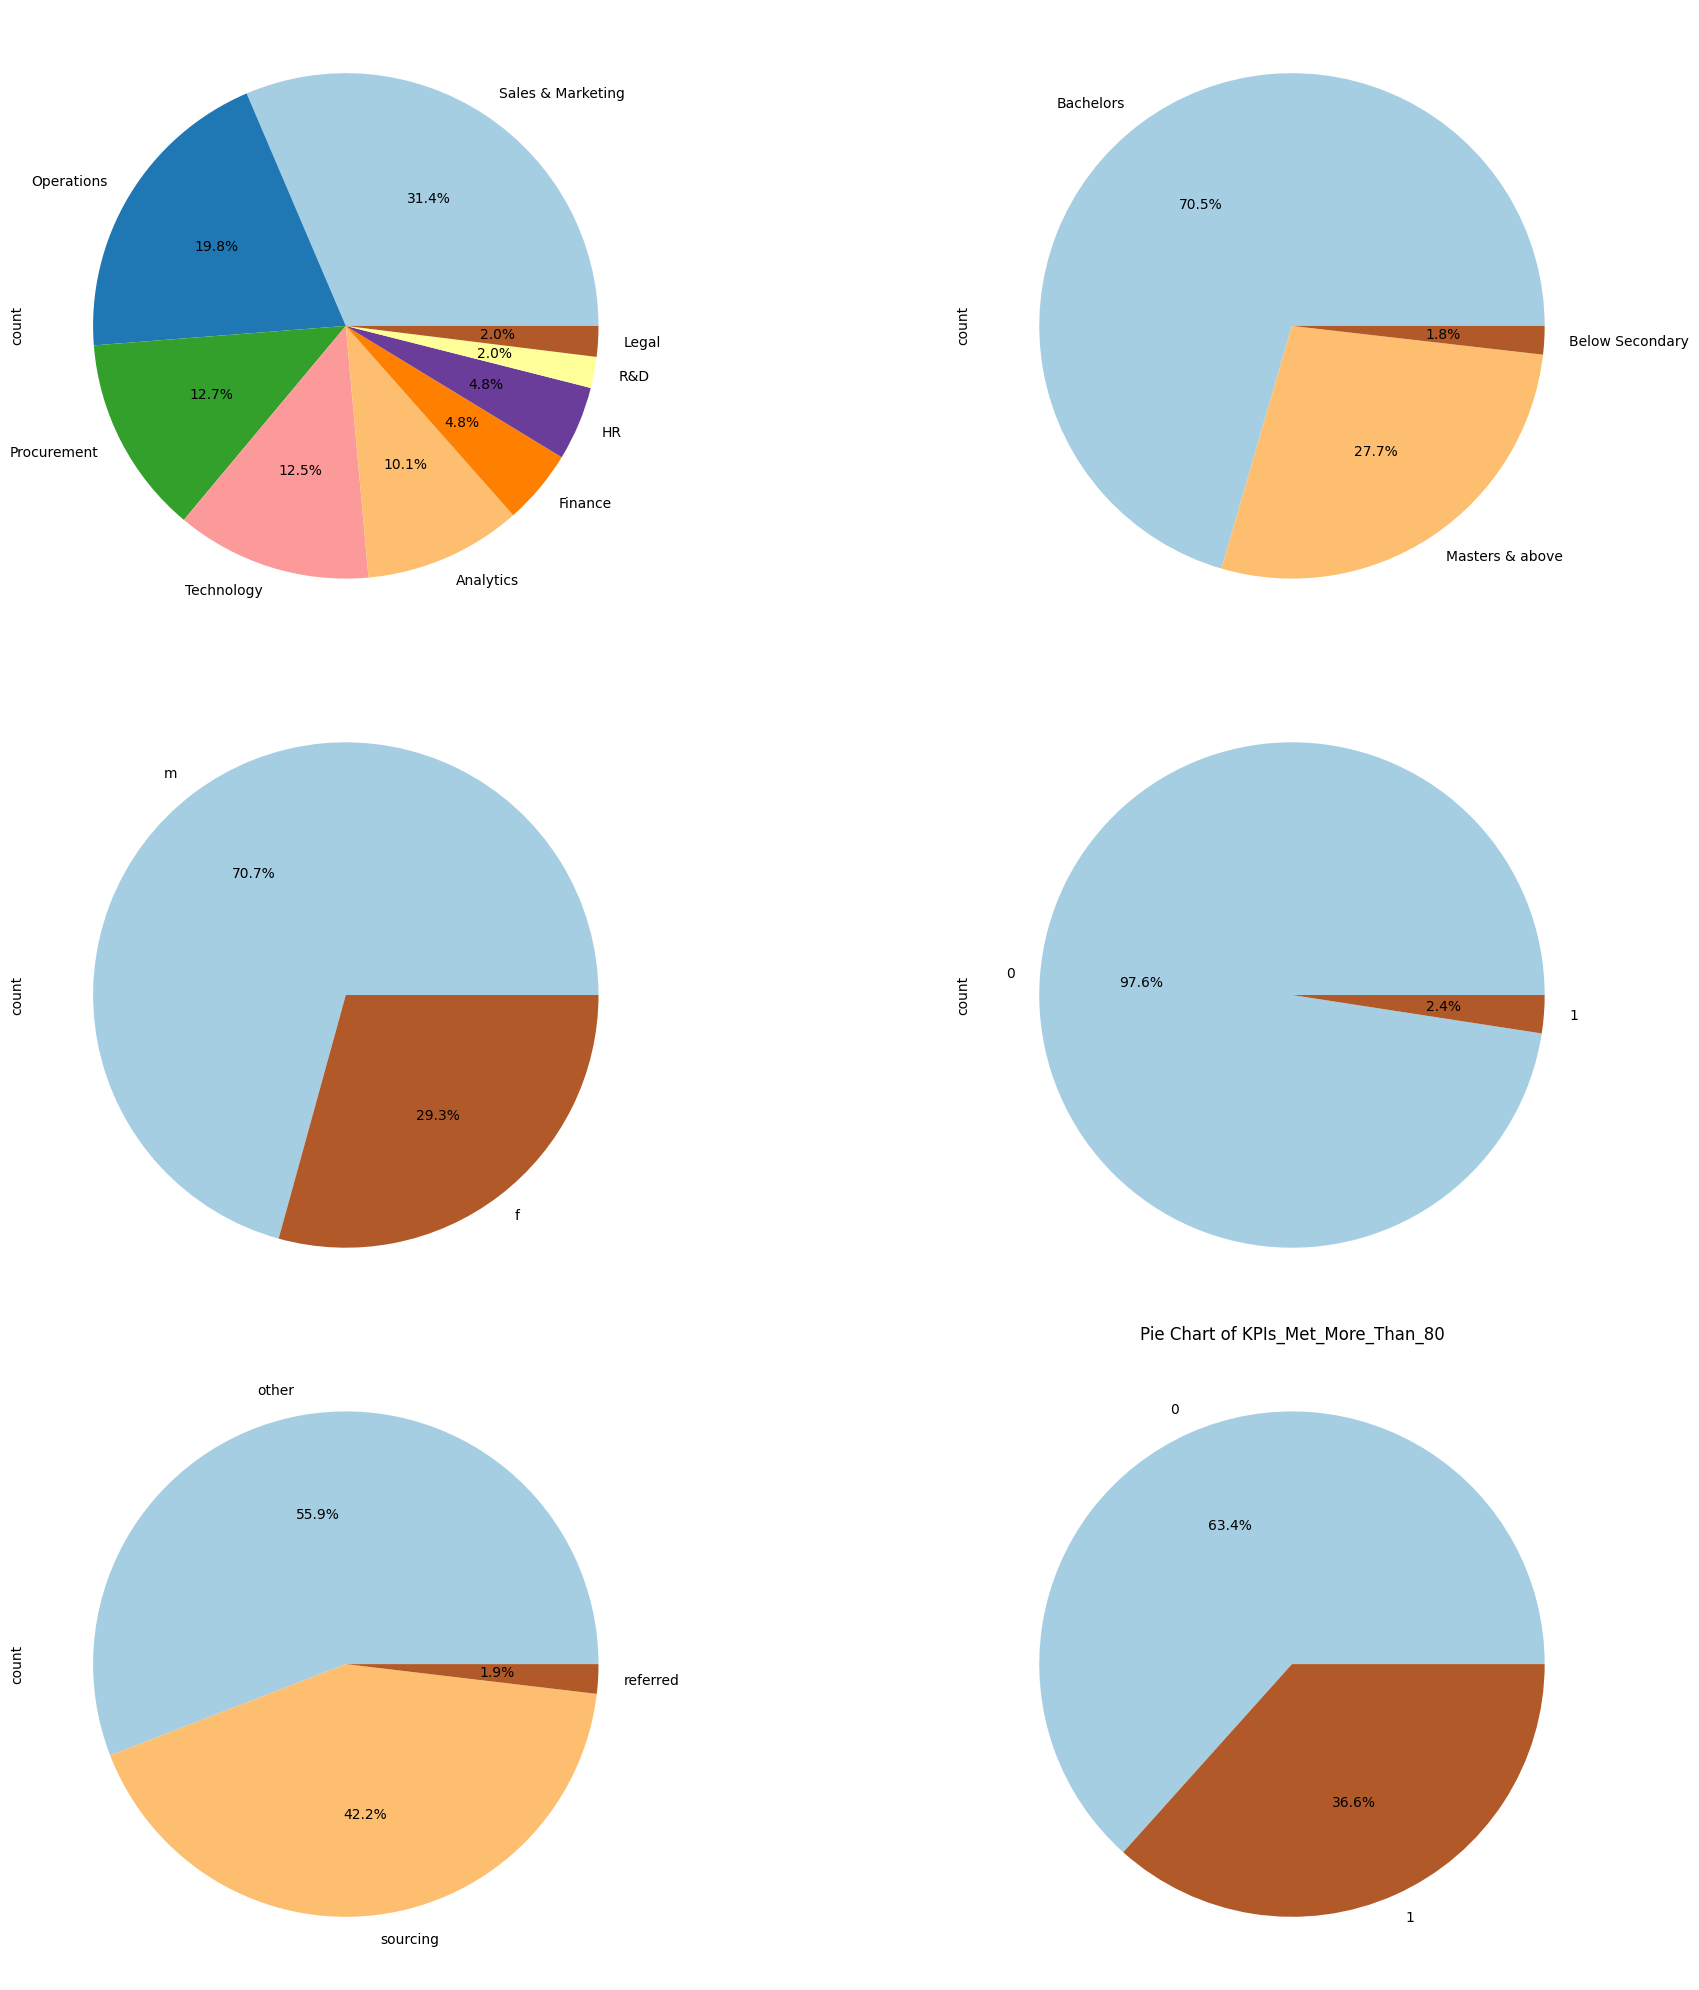

In [132]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 20))

for i, column in enumerate(categorical_columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    df[column].value_counts().plot(kind="pie", autopct="%1.1f%%",
                                   colormap="Paired", ax=ax)
    plt.title(f"Pie Chart of {column}")
    plt.ylabel("")

plt.tight_layout()
plt.show()

#### Scater Plot

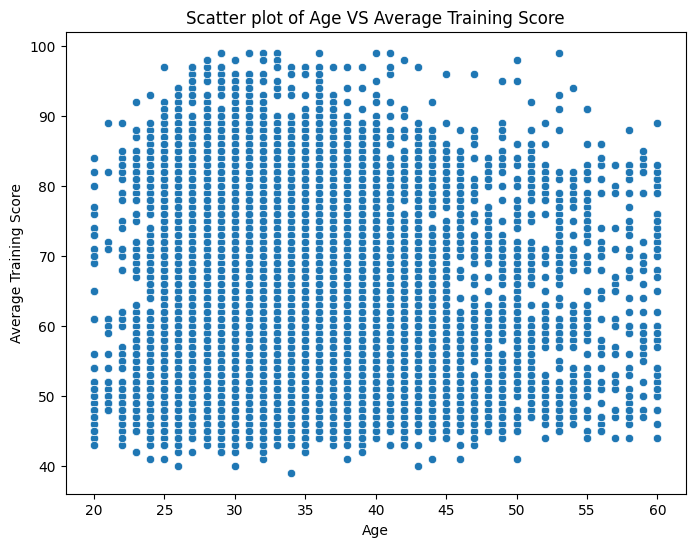

In [133]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Age"], y=df["Avg_Training_Score"])
plt.title("Scatter plot of Age VS Average Training Score")
plt.xlabel("Age")
plt.ylabel("Average Training Score")
plt.show()

### Awards won

#### By each gender

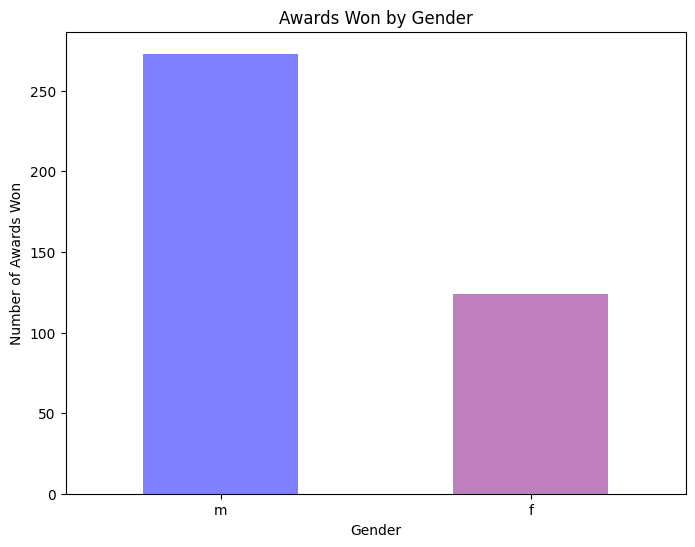

In [134]:
awards_by_gender = df[df["Awards_Won"] == 1]["Gender"].value_counts()

plt.figure(figsize=(8, 6))
awards_by_gender.plot(kind="bar", color=["blue", "purple"], alpha=0.5)
plt.title('Awards Won by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Awards Won')
plt.xticks(rotation=0)
plt.show()

#### By each Department

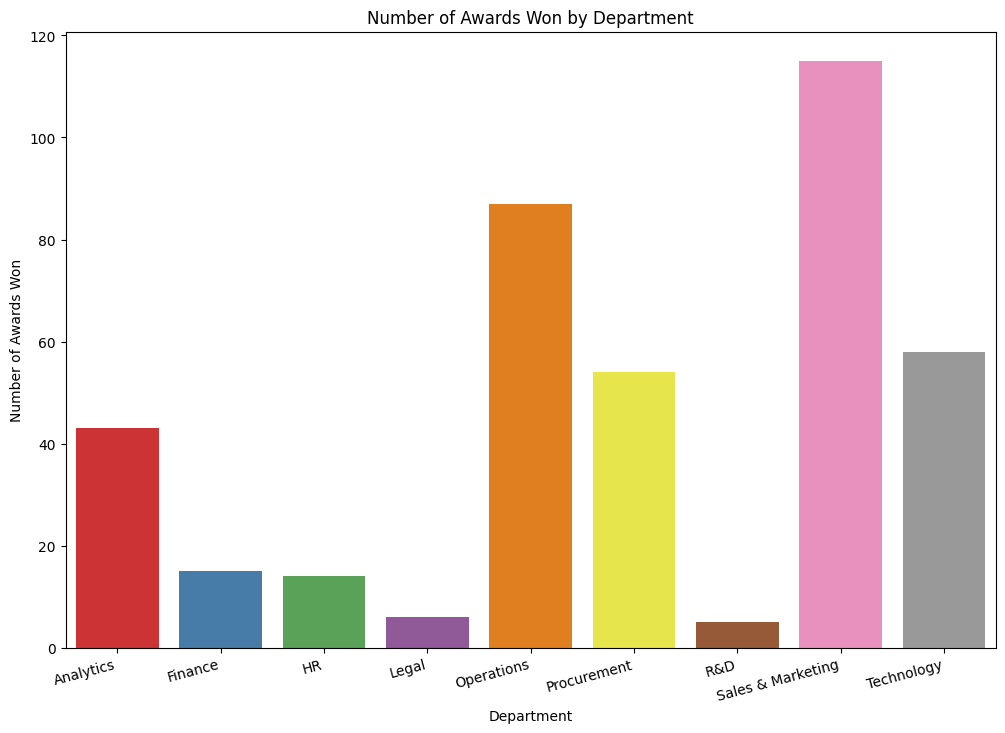

In [135]:
plt.figure(figsize=(12, 8))
awards_by_department = df[df["Awards_Won"] == 1]["Department"].value_counts().sort_index()

sns.barplot(x=awards_by_department.index, y=awards_by_department, 
            hue=awards_by_department.index, palette="Set1", legend=False)
plt.xlabel("Department")
plt.ylabel("Number of Awards Won")
plt.title("Number of Awards Won by Department")
plt.xticks(rotation=15, ha='right')
plt.show()

#### By each Age

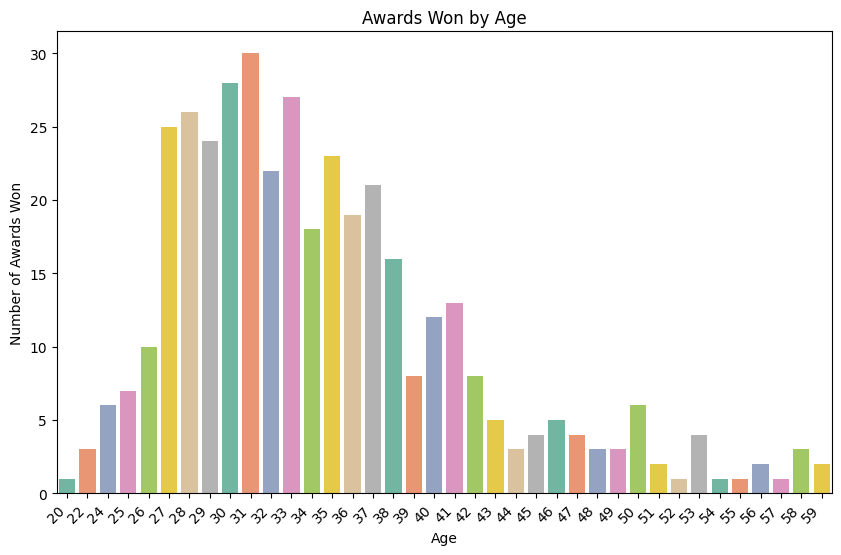

In [136]:
awards_by_Age = df[df['Awards_Won'] == 1]['Age'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df[df['Awards_Won'] == 1], palette='Set2',
              hue='Age', legend=False)
plt.title('Awards Won by Age')
plt.xlabel('Age')
plt.ylabel('Number of Awards Won')
plt.xticks(rotation=45, ha='right')
plt.show()

In [137]:
highest_age_awards_won = df[df['Awards_Won'] == 1]['Age'].max()

print("Highest Age of Employees who won awards:", highest_age_awards_won)

Highest Age of Employees who won awards: 59


#### Correlation analysis and visualize the correlation matrix using a heatmap

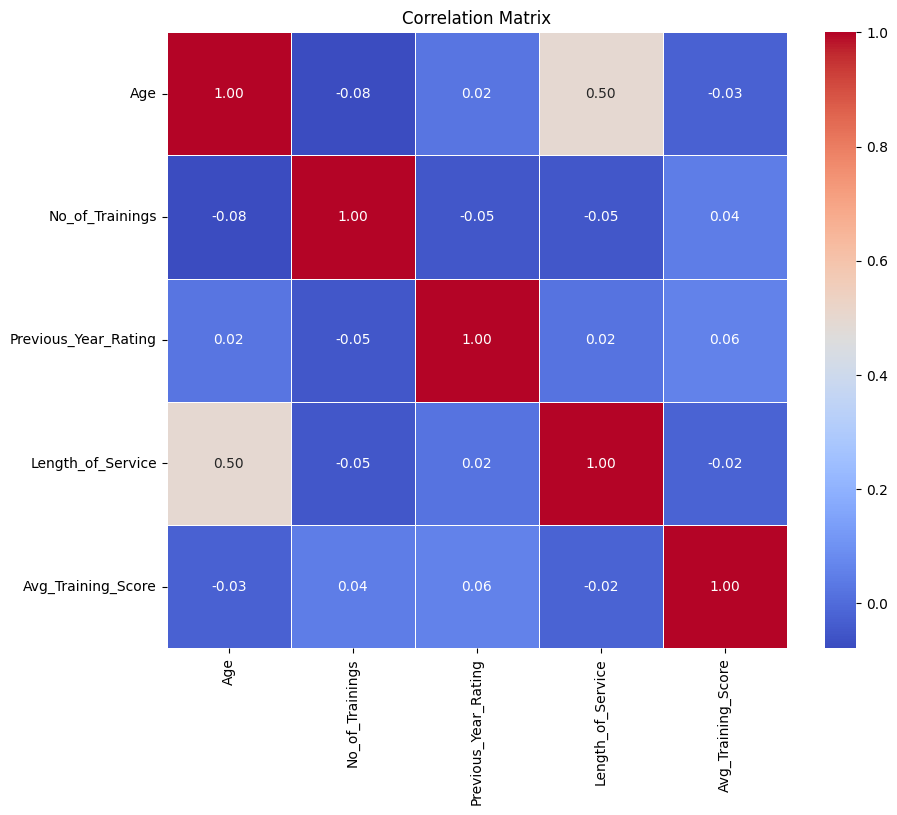

In [138]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Standardize the 'Avg_Training_Score' column using z-score normalization

In [139]:
from sklearn.preprocessing import StandardScaler
Avg_Training_Score = df[["Avg_Training_Score"]]
scaler = StandardScaler()
Avg_Training_Score_standardized = scaler.fit_transform(Avg_Training_Score)
df["Avg_Training_Score"] = Avg_Training_Score_standardized

In [140]:
df

,Employee_ID,Department,Region,Education,Gender,Recruitment_Channel,No_of_Trainings,Age,Previous_Year_Rating,Length_of_Service,KPIs_Met_More_Than_80,Awards_Won,Avg_Training_Score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,3.345459,1,1,0,1.020682
1,74430,HR,region_4,Bachelors,f,other,1,31,3.000000,5,0,0,-0.907635
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.000000,4,0,0,-1.204299
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.000000,9,0,0,0.130690
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.000000,7,0,0,-0.165974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17410,57239,Sales & Marketing,region_31,Bachelors,m,other,1,42,3.000000,10,0,0,-0.759303
17411,73858,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.000000,5,0,0,-1.352631
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.000000,6,1,0,1.317347
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.000000,9,0,0,-0.907635


#### One hot Encoding

In [141]:
df_encoded = pd.get_dummies(df, columns=["Department"], dtype="int")
df_encoded.head().T

,0,1,2,3,4
Employee_ID,8724,74430,72255,38562,64486
Region,region_26,region_4,region_13,region_2,region_29
Education,Bachelors,Bachelors,Bachelors,Bachelors,Bachelors
Gender,m,f,m,f,m
Recruitment_Channel,sourcing,other,other,other,sourcing
No_of_Trainings,1,1,1,3,1
Age,24,31,31,31,30
Previous_Year_Rating,3.345459,3.0,1.0,2.0,4.0
Length_of_Service,1,5,4,9,7
KPIs_Met_More_Than_80,1,0,0,0,0
